In [ ]:
#Observable Trends
#1 - Capomulin is the most effective treatment for metastatic tumors. Comparatively, it is the best at reducing the volume and number of tumors
#2 - Besides the placebo treatment,tumor size and number of tumors had the highest growth rate with Ketapril treatment
#3 - The last figure shows the mice under Capomulin treatment had the highest survival rate within the span of 45 days

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_data = "mouse_drug_data.csv"
clinical_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_pd = pd.read_csv(mouse_data)
clinical_data_pd = pd.read_csv(clinical_data)

# display(mouse_data_pd, clinical_data_pd)
# clinical_data_pd['Mouse ID'].count()

# Combine the data into a single dataset
merged = pd.merge(mouse_data_pd, clinical_data_pd, on="Mouse ID", how="left")
merged_df = merged.sort_values(['Timepoint', 'Metastatic Sites'])

# Display the data table for preview
merged_df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
8,x402,Stelasyn,0,45.000000,0
18,a492,Stelasyn,0,45.000000,0
28,w540,Stelasyn,0,45.000000,0
34,v764,Stelasyn,0,45.000000,0
...,...,...,...,...,...
1764,t718,Placebo,45,63.423695,4
1782,x773,Placebo,45,58.634971,4
1813,o795,Placebo,45,73.059454,4
1855,c766,Placebo,45,69.823146,4


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = merged_df.groupby(['Drug', 'Timepoint'])
average = grouped['Tumor Volume (mm3)'].mean()
average

# Convert to DataFrame
treatment_data_avg = pd.DataFrame(data=average)
treatment_data_avg.reset_index(level=0, inplace=True)
treatment_data_avg.reset_index(level=0, inplace=True)
# Preview DataFrame
treatment_data_avg.head()

# treatment_data.to_csv('Treatment Sample.csv', index=False, header=True)

,Timepoint,Drug,Tumor Volume (mm3)
0,0,Capomulin,45.000000
1,5,Capomulin,44.266086
2,10,Capomulin,43.084291
3,15,Capomulin,42.064317
4,20,Capomulin,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = grouped['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
treatment_data_sem = pd.DataFrame({"Tumor Volume Standard Error (mm3)": standard_error})
treatment_data_sem.reset_index(level=0, inplace=True)
treatment_data_sem.reset_index(level=0, inplace=True)
# Preview DataFrame
treatment_data_sem.head()


,Timepoint,Drug,Tumor Volume Standard Error (mm3)
0,0,Capomulin,0.000000
1,5,Capomulin,0.448593
2,10,Capomulin,0.702684
3,15,Capomulin,0.838617
4,20,Capomulin,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_df = treatment_data_avg.pivot(index='Timepoint', columns='Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#Getting mean data for each drug
Capomulin_data = pivot_df.iloc[:,0]

Infubinol_data = pivot_df.iloc[:,2]

Ketapril_data = pivot_df.iloc[:,3]

Placebo_data = pivot_df.iloc[:,5]

In [6]:
# y error values for each drug
y_error_Capomulin = treatment_data_sem.loc[treatment_data_sem["Drug"]=="Capomulin","Tumor Volume Standard Error (mm3)"]

y_error_Infubinol = treatment_data_sem.loc[treatment_data_sem["Drug"]=="Infubinol","Tumor Volume Standard Error (mm3)"]

y_error_Ketapril = treatment_data_sem.loc[treatment_data_sem["Drug"]=="Ketapril","Tumor Volume Standard Error (mm3)"]

y_error_Placebo = treatment_data_sem.loc[treatment_data_sem["Drug"]=="Placebo","Tumor Volume Standard Error (mm3)"]


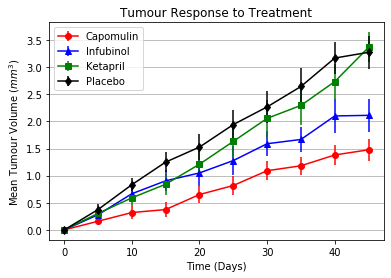

In [24]:
# Generate the Plot (with Error Bars)

fig1, ax1 = plt.subplots()

x_val = [i*5 for i in range(10)]

ax1.errorbar(x_val,Capomulin_data, yerr=y_error_Capomulin, marker='o', color="red", label="Capomulin")
ax1.errorbar(x_val,Infubinol_data, yerr=y_error_Infubinol, marker='^', color="blue", label="Infubinol")
ax1.errorbar(x_val,Ketapril_data, yerr=y_error_Ketapril, marker='s', color="green", label="Ketapril")
ax1.errorbar(x_val,Placebo_data, yerr=y_error_Placebo, marker='d', color="black", label="Placebo")

#adding labels to the graph
ax1.set_title("Tumour Response to Treatment")
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Mean Tumour Volume ($mm^3$)")
ax1.grid(axis = 'y')
ax1.legend()

# Save the Figure
fig1.savefig("Fig 1 - Tumor Response to Treatment.png")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_average = grouped['Metastatic Sites'].mean()
met_site_average

# Convert to DataFrame
met_data_avg = pd.DataFrame(data=met_site_average)
met_data_avg.reset_index(level=0, inplace=True)
met_data_avg.reset_index(level=0, inplace=True)
# Preview DataFrame
met_data_avg.head()



,Timepoint,Drug,Metastatic Sites
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
met_standard_error = grouped['Metastatic Sites'].sem()

# Convert to DataFrame
met_data_sem = pd.DataFrame(data=met_standard_error)
met_data_sem.reset_index(level=0, inplace=True)
met_data_sem.reset_index(level=0, inplace=True)
# Preview DataFrame
met_data_sem.head()


,Timepoint,Drug,Metastatic Sites
0,0,Capomulin,0.000000
1,5,Capomulin,0.074833
2,10,Capomulin,0.125433
3,15,Capomulin,0.132048
4,20,Capomulin,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot_df = met_data_avg.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
met_pivot_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [11]:
#Getting mean data for each drug
Capomulin_data = met_pivot_df.iloc[:,0]

Infubinol_data = met_pivot_df.iloc[:,2]

Ketapril_data = met_pivot_df.iloc[:,3]

Placebo_data = met_pivot_df.iloc[:,5]

In [12]:
# y error values for each drug
y_error_Capomulin = met_data_sem.loc[met_data_sem["Drug"]=="Capomulin","Metastatic Sites"]

y_error_Infubinol = met_data_sem.loc[met_data_sem["Drug"]=="Infubinol","Metastatic Sites"]

y_error_Ketapril = met_data_sem.loc[met_data_sem["Drug"]=="Ketapril","Metastatic Sites"]

y_error_Placebo = met_data_sem.loc[met_data_sem["Drug"]=="Placebo","Metastatic Sites"]


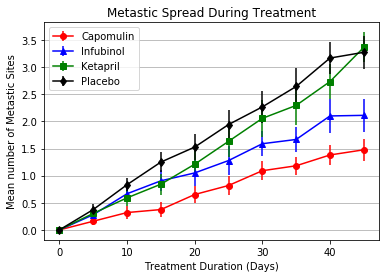

In [13]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()

x_val = [i*5 for i in range(10)]

ax2.errorbar(x_val,Capomulin_data, yerr=y_error_Capomulin, marker='o', color="red", label="Capomulin")
ax2.errorbar(x_val,Infubinol_data, yerr=y_error_Infubinol, marker='^', color="blue", label="Infubinol")
ax2.errorbar(x_val,Ketapril_data, yerr=y_error_Ketapril, marker='s', color="green", label="Ketapril")
ax2.errorbar(x_val,Placebo_data, yerr=y_error_Placebo, marker='d', color="black", label="Placebo")

#adding labels to the graph
ax2.set_title("Metastic Spread During Treatment")
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Mean number of Metastic Sites")
ax2.grid(axis = 'y')
ax2.legend();

# Save the Figure
fig2.savefig("Fig 2 - Metastatic Sites.png")

## Survival Rates

In [14]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mice_count = grouped['Mouse ID'].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mice Count":mice_count})
mice_count_df.reset_index(level=0, inplace=True)
mice_count_df.reset_index(level=0, inplace=True)
# Preview DataFrame
mice_count_df.head()

,Timepoint,Drug,Mice Count
0,0,Capomulin,25
1,5,Capomulin,25
2,10,Capomulin,25
3,15,Capomulin,24
4,20,Capomulin,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count_df.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
mice_count_pivot.head()

Mice Count                                                        \
Drug       Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                    
0                 25       25        25       25       25      25       26   
5                 25       21        25       23       23      24       25   
10                25       20        21       22       21      24       23   
15                24       19        21       19       21      20       17   
20                23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [16]:
# Drug survival rates as a percentages
def drug_percentages(drug):
    if drug == "Capomulin":
        return (mice_count_pivot.iloc[:,0]/mice_count_pivot.iloc[0,0])*100
    elif drug == "Infubinol":
        return (mice_count_pivot.iloc[:,2]/mice_count_pivot.iloc[0,2])*100
    elif drug == "Ketapril":
        return (mice_count_pivot.iloc[:,3]/mice_count_pivot.iloc[0,3])*100
    elif drug == "Placebo":
        return (mice_count_pivot.iloc[:,5]/mice_count_pivot.iloc[0,5])*100
    else:
        return "Please enter the following drugs only: Capomulin, Infubinol, Ketapril, Placebo"


Capomulin_Percent = drug_percentages("Capomulin")

Infubinol_Percent = drug_percentages("Infubinol")

Ketapril_Percent = drug_percentages("Ketapril")

Placebo_Percent = drug_percentages("Placebo")


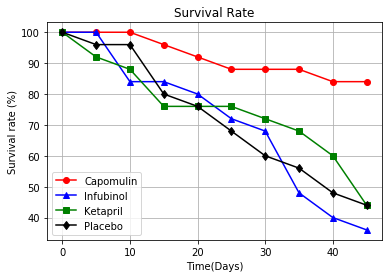

In [17]:
# Generate the Plot (Accounting for percentages)
fig3, ax3 = plt.subplots()
x_val = [i*5 for i in range(10)]

ax3.plot(x_val,Capomulin_Percent,marker='o',color="red",label="Capomulin")
ax3.plot(x_val,Infubinol_Percent,marker='^',color="blue",label="Infubinol")
ax3.plot(x_val,Ketapril_Percent,marker='s',color="green",label="Ketapril")
ax3.plot(x_val,Placebo_Percent,marker='d',color="black",label="Placebo")
ax3.legend()
ax3.grid()
ax3.set_title("Survival Rate")
ax3.set_xlabel("Time(Days)")
ax3.set_ylabel("Survival rate (%)");

# Save the Figure
fig3.savefig("Fig 3 - Survival Rate")
# Show the Figure

## Summary Bar Graph

In [18]:
# Minor Data Munging to Re-Format the Data Frames
pivot_df_2 = treatment_data_avg.pivot(index='Timepoint', columns='Drug', values = 'Tumor Volume (mm3)')

percent_change = (pivot_df_2.iloc[-1]/(pivot_df_2.iloc[0])-1)*100

# Display the data to confirm

print(percent_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


Drug
Capomulin     True
Ceftamin     False
Infubinol    False
Ketapril     False
Naftisol     False
Placebo      False
Propriva     False
Ramicane      True
Stelasyn     False
Zoniferol    False
dtype: bool


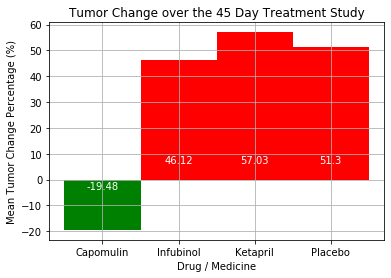

In [23]:
pass_drug = percent_change < 0 
print(pass_drug)

pill_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
perc_change_list = [round(percent_change[drug],2) for drug in pill_list]

# graph making
fig4, ax4 = plt.subplots()

passing_colors = pass_drug.map({True:'g',False:'r'})
y = [1,2,3,4]
ax4.grid()
ax4.set_title('Tumor Change over the 45 Day Treatment Study');
ax4.set_xlabel('Drug / Medicine');
ax4.set_ylabel('Mean Tumor Change Percentage (%)');
final_chart = ax4.bar(pill_list, perc_change_list,width=-1,color=passing_colors)
# Use functions to label the percentages of changes
def label_maker(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2.0, label_position),
                    xytext=(0, 9), textcoords="offset points", 
                     ha='center',va='bottom',color='w')
# Call functions to implement the function calls
label_maker(final_chart);
# Save the Figure
fig4.savefig('Fig 4 - Tumor Change over the 45 Day Treatment Study')
# Show the Figure
fig4;